In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

In [8]:
df=pd.read_csv("brent-daily.csv")

In [9]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9051,2023-01-17,84.38
9052,2023-01-18,83.78
9053,2023-01-19,85.08
9054,2023-01-20,86.96


In [10]:
df=df.set_index('Date')

In [11]:


# Split the data into training and testing sets
train_data =  df.loc[:'2018-01-01']
test_data = df.loc['2018-01-01':]

# Scale the data using StandardScaler
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of past time steps to use for prediction
seq_len = 30

# Create the input sequences and corresponding outputs
def create_sequences(data, seq_len):
    X = []
    y = []
    num_sequences = len(data) - seq_len
    for i in range(num_sequences):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled, seq_len)
X_test, y_test = create_sequences(test_data_scaled, seq_len)

# Define the model architecture
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(seq_len, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32)

# Evaluate the model on the test data
mse = model.evaluate(X_test, y_test)
print('Mean squared error on test data:', mse)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Rescale the data back to the original range
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Convert the numpy arrays to pandas dataframes
y_test_df = pd.DataFrame(y_test_rescaled, index=test_data.index[seq_len:])
y_pred_df = pd.DataFrame(y_pred_rescaled, index=test_data.index[seq_len:])

# Print the actual and predicted values for the test set
print('Actual:\n', y_test_df)
print('Predicted:\n', y_pred_df)

Epoch 1/200
242/242 [==============================] - 30s 60ms/step - loss: 0.0205
Epoch 2/200
242/242 [==============================] - 12s 48ms/step - loss: 0.0041
Epoch 3/200
242/242 [==============================] - 12s 48ms/step - loss: 0.0031
Epoch 4/200
242/242 [==============================] - 14s 57ms/step - loss: 0.0026
Epoch 5/200
242/242 [==============================] - 14s 59ms/step - loss: 0.0021
Epoch 6/200
242/242 [==============================] - 15s 64ms/step - loss: 0.0018
Epoch 7/200
242/242 [==============================] - 13s 52ms/step - loss: 0.0017
Epoch 8/200
242/242 [==============================] - 13s 52ms/step - loss: 0.0015
Epoch 9/200
242/242 [==============================] - 14s 57ms/step - loss: 0.0014
Epoch 10/200
242/242 [==============================] - 13s 52ms/step - loss: 0.0014
Epoch 11/200
242/242 [==============================] - 14s 58ms/step - loss: 0.0013
Epoch 12/200
242/242 [==============================] - 12s 51ms/step - lo

242/242 [==============================] - 12s 48ms/step - loss: 0.0011
Epoch 98/200
242/242 [==============================] - 12s 49ms/step - loss: 0.0012
Epoch 99/200
242/242 [==============================] - 12s 49ms/step - loss: 0.0011
Epoch 100/200
242/242 [==============================] - 11s 47ms/step - loss: 0.0011
Epoch 101/200
242/242 [==============================] - 11s 47ms/step - loss: 0.0012
Epoch 102/200
242/242 [==============================] - 12s 48ms/step - loss: 0.0011
Epoch 103/200
242/242 [==============================] - 12s 51ms/step - loss: 0.0011
Epoch 104/200
242/242 [==============================] - 15s 60ms/step - loss: 0.0011
Epoch 105/200
242/242 [==============================] - 15s 60ms/step - loss: 0.0011
Epoch 106/200
242/242 [==============================] - 15s 64ms/step - loss: 0.0011
Epoch 107/200
242/242 [==============================] - 12s 50ms/step - loss: 0.0012
Epoch 108/200
242/242 [==============================] - 12s 51ms/step

242/242 [==============================] - 11s 45ms/step - loss: 0.0011
Epoch 193/200
242/242 [==============================] - 11s 46ms/step - loss: 0.0011
Epoch 194/200
242/242 [==============================] - 11s 46ms/step - loss: 0.0011
Epoch 195/200
242/242 [==============================] - 11s 46ms/step - loss: 0.0011
Epoch 196/200
242/242 [==============================] - 11s 46ms/step - loss: 0.0011
Epoch 197/200
242/242 [==============================] - 11s 46ms/step - loss: 0.0011
Epoch 198/200
242/242 [==============================] - 11s 46ms/step - loss: 0.0011
Epoch 199/200
242/242 [==============================] - 11s 47ms/step - loss: 0.0011
Epoch 200/200
40/40 [==============================] - 25s 20ms/step - loss: 0.0036
Mean squared error on test data: 0.003562819678336382
40/40 [==============================] - 3s 19ms/step
Actual:
                 0
Date             
2018-02-13  61.94
2018-02-14  62.29
2018-02-15  62.86
2018-02-16  64.30
2018-02-19  64.95

In [15]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://b030d8f3-c29a-46b8-8632-db1c3eb5036e/assets


INFO:tensorflow:Assets written to: ram://b030d8f3-c29a-46b8-8632-db1c3eb5036e/assets


In [13]:
import pickle

In [16]:
pickle.load(open('model.pkl','rb'))

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://10c38286-a1f6-4ad5-8b2b-1bcd7dccf14b/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [17]:
model.save('my_model.h5')

# Load the model
#loaded_model = tf.keras.models.load_model('my_model.h5')

In [20]:
loaded_model = tf.keras.models.load_model('my_model.h5')

In [19]:
import tensorflow as tf

In [21]:
loaded_model

In [24]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print('R-squared score on test data:', r2)


R-squared score on test data: 0.9915058899417266


In [30]:
forecast=model.predict(df,batch_size=5)

1812/1812 [==============================] - 7s 3ms/step


In [32]:
forecast.shape

(9056, 1)

In [33]:
# Define the number of future time steps to forecast
forecast_horizon = 1254

# Scale the most recent data using StandardScaler
latest_data = df.tail(seq_len).values.reshape(-1, 1)
latest_data_scaled = scaler.transform(latest_data)

# Create a list to store the forecasted values
forecast = []

# Loop through the forecast horizon and make predictions
for i in range(forecast_horizon):
    # Reshape the data into the expected input shape for the model
    X = latest_data_scaled.reshape(1, seq_len, 1)
    
    # Make a prediction using the model
    y_pred = model.predict(X)
    
    # Rescale the predicted value back to the original range
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    
    # Append the forecasted value to the list
    forecast.append(y_pred_rescaled[0][0])
    
    # Update the latest data with the new forecasted value
    latest_data = np.append(latest_data[1:], y_pred_rescaled)
    latest_data_scaled = scaler.transform(latest_data.reshape(-1, 1))
    
# Create a pandas dataframe to store the forecasted values
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_horizon+1, freq='D')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['forecast'])

# Print the forecasted values
print(forecast_df)


1/1 [==============================] - 0s 41ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


             forecast
2023-01-24  87.806831
2023-01-25  87.922813
2023-01-26  88.023590
2023-01-27  88.208130
2023-01-28  88.464439
2023-01-29  88.766495
2023-01-30  89.093147
2023-01-31  89.438278
2023-02-01  89.792046
2023-02-02  90.153191
2023-02-03  90.513359
2023-02-04  90.875397
2023-02-05  91.237160
2023-02-06  91.594467
2023-02-07  91.952942
2023-02-08  92.316254
2023-02-09  92.678383
2023-02-10  93.042343
2023-02-11  93.407631
2023-02-12  93.775719
2023-02-13  94.145660
2023-02-14  94.519707
2023-02-15  94.899574
2023-02-16  95.287781
2023-02-17  95.680923
2023-02-18  96.081184
2023-02-19  96.485786
2023-02-20  96.892845
2023-02-21  97.303642
2023-02-22  97.718323


In [49]:
r2_score(df1['Price'],forecast_df)

-13.180360707181604

In [47]:
df1=df.iloc[-30:
           ]

In [48]:
df1

,Price
Date,
2022-12-08,76.02
2022-12-09,76.37
2022-12-12,78.00
2022-12-13,80.14
2022-12-14,83.33
2022-12-15,82.34
2022-12-16,80.20
2022-12-19,81.66
2022-12-20,79.45


## Data Visualization

<AxesSubplot:xlabel='month', ylabel='year'>

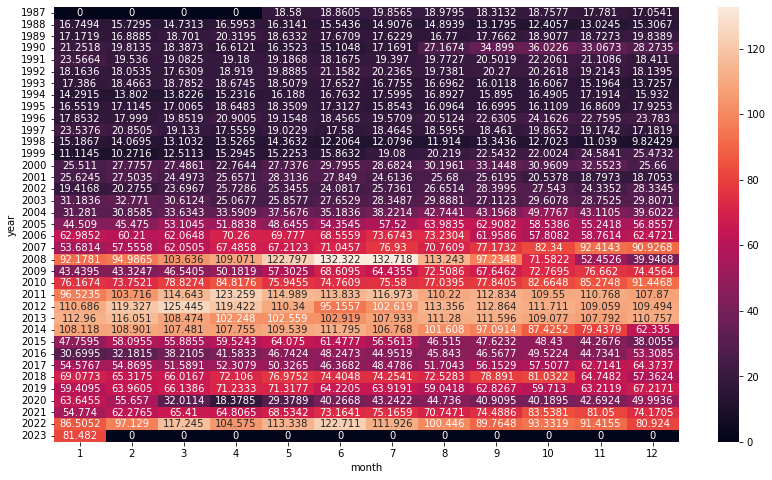

In [9]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

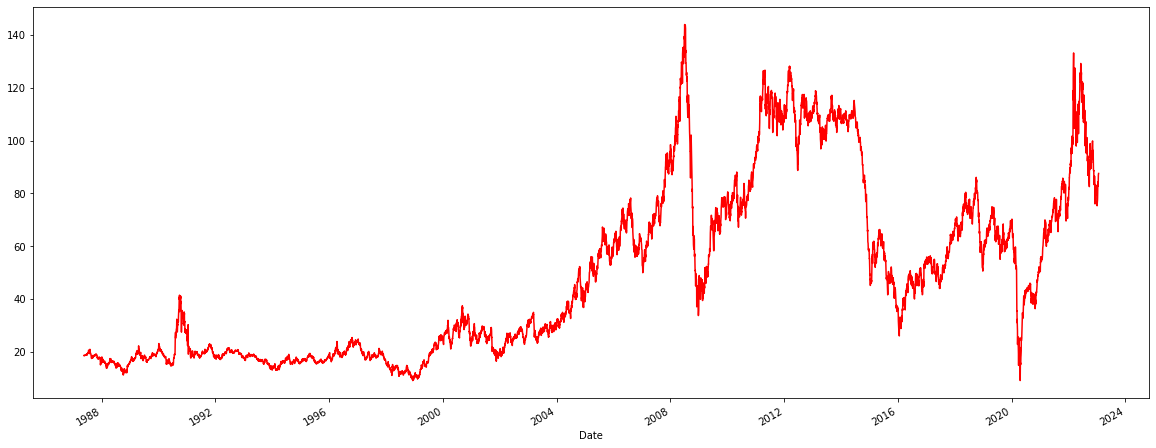

In [10]:
df['Price'].plot(figsize=(20, 8),color='red')
plt.show()

<AxesSubplot:xlabel='month', ylabel='Price'>

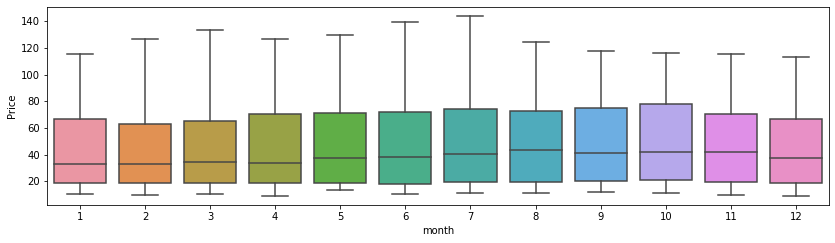

In [11]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Price",data=df)

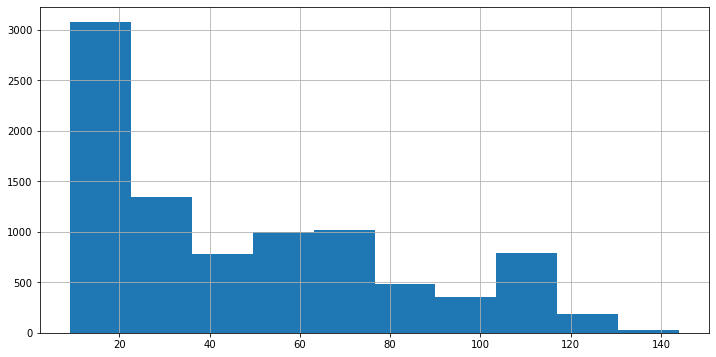

In [12]:
df.Price.hist(figsize=(12,6))
plt.show()

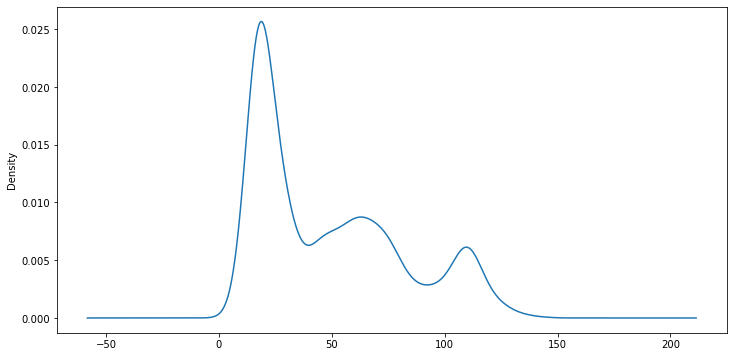

In [13]:
df.Price.plot(kind='kde', figsize=(12,6))
plt.show()

In [14]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

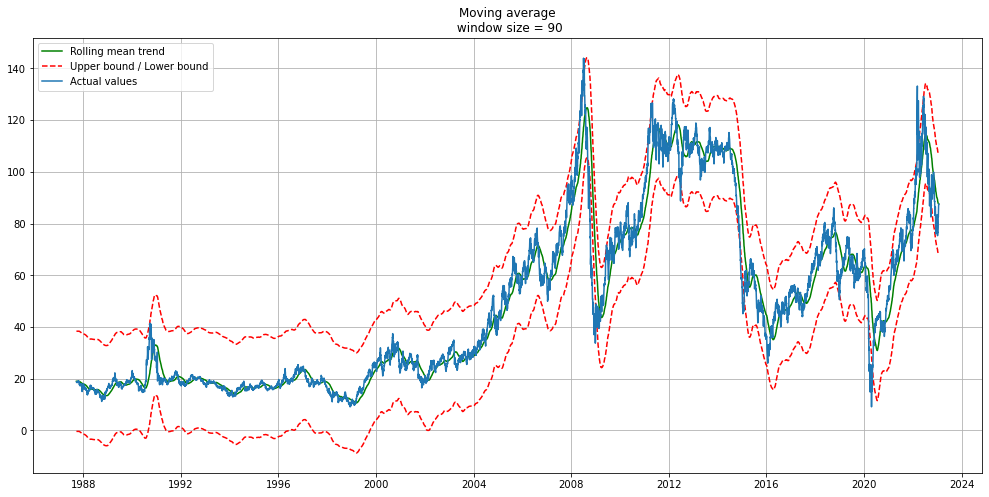

In [15]:
plot_moving_average(df.Price, 90, plot_intervals=True)

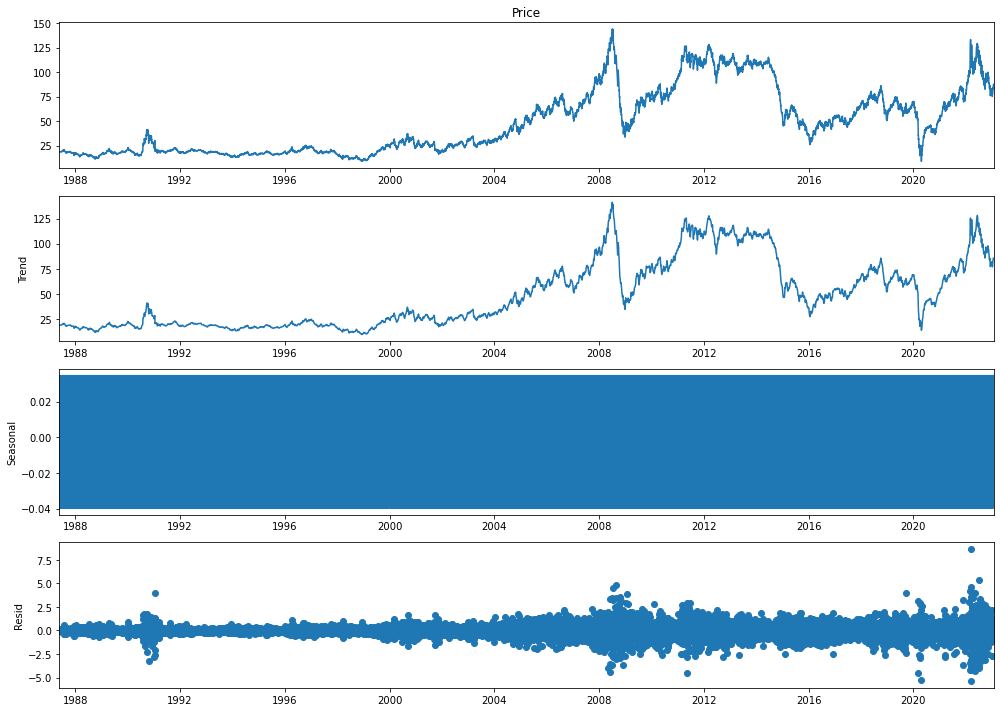

In [16]:
decompose_ts_add = seasonal_decompose(df.Price,period=4)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


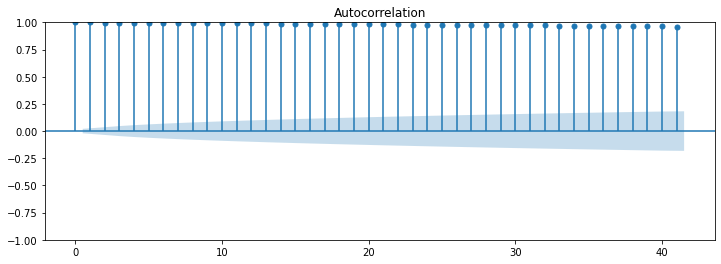

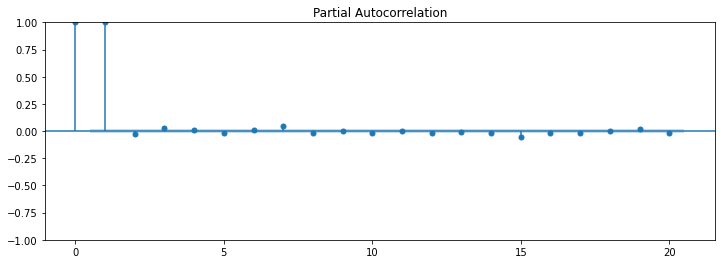

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Price,lags=41)
    tsa_plots.plot_pacf(df.Price,lags=20)
    plt.show()

In [18]:
df

,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
1987-05-20,18.63,2,2,5,1987,140,20,21
1987-05-21,18.45,3,2,5,1987,141,21,21
1987-05-22,18.55,4,2,5,1987,142,22,21
1987-05-25,18.60,0,2,5,1987,145,25,22
1987-05-26,18.63,1,2,5,1987,146,26,22
...,...,...,...,...,...,...,...,...
2023-01-17,84.38,1,1,1,2023,17,17,3
2023-01-18,83.78,2,1,1,2023,18,18,3
2023-01-19,85.08,3,1,1,2023,19,19,3


In [9]:
train_df = df.loc[:'2018-01-01']
test_df = df.loc['2018-01-01':]

In [54]:
train_df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2017-12-21,64.64
2017-12-22,64.61
2017-12-27,66.03


In [55]:
test_df

,Price
Date,
2018-01-02,66.65
2018-01-03,67.85
2018-01-04,68.73
2018-01-05,68.01
2018-01-08,68.48
...,...
2023-01-17,84.38
2023-01-18,83.78
2023-01-19,85.08


In [27]:
from statsmodels.tsa.stattools import adfuller

In [34]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    print ('----------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print (adf_output)
    
# calling adf function and passing series
adf_test(df.values)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                   -2.051132
p-value                           0.264613
#Lags Used                       29.000000
Number of Observations Used    9026.000000
Critical Value (1%)              -3.431075
Critical Value (5%)              -2.861860
Critical Value (10%)             -2.566940
dtype: float64


In [29]:
df.values

array([[18.63, 2, 2, ..., 140, 20, 21],
       [18.45, 3, 2, ..., 141, 21, 21],
       [18.55, 4, 2, ..., 142, 22, 21],
       ...,
       [85.08, 3, 1, ..., 19, 19, 3],
       [86.96, 4, 1, ..., 20, 20, 3],
       [87.54, 0, 1, ..., 23, 23, 4]], dtype=object)

In [36]:
diffdf=df.diff()

In [37]:
diffdf

,Price
Date,
1987-05-20,NaN
1987-05-21,-0.18
1987-05-22,0.10
1987-05-25,0.05
1987-05-26,0.03
...,...
2023-01-17,1.73
2023-01-18,-0.60
2023-01-19,1.30


In [39]:
diffdf.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

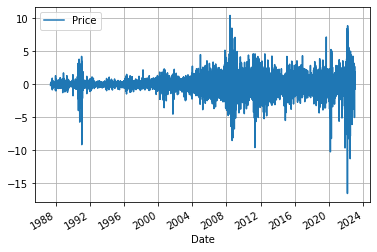

In [41]:
diffdf.plot(grid=True)

In [42]:
adf_test(diffdf)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                -1.555203e+01
p-value                        2.094083e-28
#Lags Used                     2.800000e+01
Number of Observations Used    9.026000e+03
Critical Value (1%)           -3.431075e+00
Critical Value (5%)           -2.861860e+00
Critical Value (10%)          -2.566940e+00
dtype: float64


In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


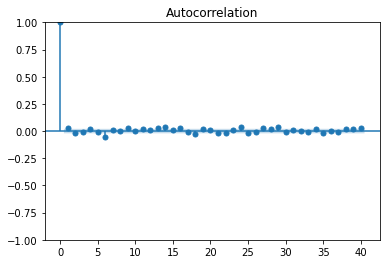

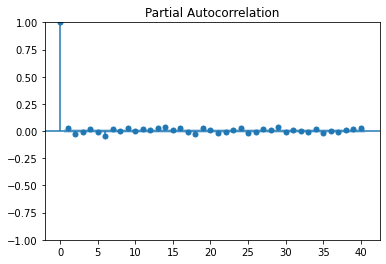

In [46]:
plot_acf(diffdf);
plot_pacf(diffdf);

In [50]:
!pip install pmdarima --q 
!pip install prophet --q 

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [73]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(1284)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

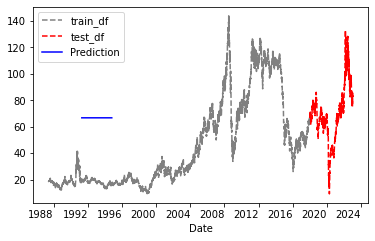

In [74]:
train_df['Price'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Price'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [75]:
print('Train RMSE:',mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE: 1.0587326132630897
Test RMSE: 21.27153128337853
Train MAPE: 0.01587667226751576
Test MAPE: 0.276129513388774


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [54]:
ar = ARIMA(train_df['Price'], order=(3,1,0)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(1284)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [55]:
print('Train RMSE:',mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE: 1.0789286256163997
Test RMSE: 21.27595191327023
Train MAPE: 0.016009196001315364
Test MAPE: 0.2760587614901867


In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(test_df['Price'],ar_test_pred)

-0.0235108616868962

In [16]:
prophet_df = df.copy()
prophet_df.reset_index(inplace=True)
prophet_df.columns=['ds','y']
prophet_df.shape


(9056, 2)

In [84]:
prophet_df

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9051,2023-01-17,84.38
9052,2023-01-18,83.78
9053,2023-01-19,85.08
9054,2023-01-20,86.96


In [90]:
prophet_train_df = prophet_df.iloc[:7772]
prophet_test_df = prophet_df.iloc[7772:]

In [92]:

prophet_test_df.shape

(1284, 2)

In [93]:
prophet_model = Prophet()
prophet_model.fit(prophet_train_df)

16:49:39 - cmdstanpy - INFO - Chain [1] start processing
16:49:53 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
future = prophet_model.make_future_dataframe(periods=1284)
prophet_predictions = prophet_model.predict(future)

In [97]:
prophet_predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-05-20,16.304353,3.477246,29.945084,16.304353,16.304353,0.495138,0.495138,0.495138,-0.487462,-0.487462,-0.487462,0.982600,0.982600,0.982600,0.0,0.0,0.0,16.799491
1,1987-05-21,16.307877,4.242481,30.236228,16.307877,16.307877,0.699651,0.699651,0.699651,-0.307398,-0.307398,-0.307398,1.007050,1.007050,1.007050,0.0,0.0,0.0,17.007528
2,1987-05-22,16.311400,3.592416,30.025688,16.311400,16.311400,0.602323,0.602323,0.602323,-0.428229,-0.428229,-0.428229,1.030552,1.030552,1.030552,0.0,0.0,0.0,16.913723
3,1987-05-25,16.321972,3.648820,29.654137,16.321972,16.321972,0.735789,0.735789,0.735789,-0.355675,-0.355675,-0.355675,1.091464,1.091464,1.091464,0.0,0.0,0.0,17.057761
4,1987-05-26,16.325495,3.485909,28.540152,16.325495,16.325495,0.593106,0.593106,0.593106,-0.514290,-0.514290,-0.514290,1.107396,1.107396,1.107396,0.0,0.0,0.0,16.918601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,2021-07-01,-13.019853,-43.163189,18.213485,-41.755852,17.090485,0.706356,0.706356,0.706356,-0.307398,-0.307398,-0.307398,1.013754,1.013754,1.013754,0.0,0.0,0.0,-12.313498
9052,2021-07-02,-13.058112,-45.619695,19.448968,-41.875666,17.105268,0.623867,0.623867,0.623867,-0.428229,-0.428229,-0.428229,1.052096,1.052096,1.052096,0.0,0.0,0.0,-12.434246
9053,2021-07-03,-13.096371,-42.680717,21.042415,-41.993216,17.098607,2.139321,2.139321,2.139321,1.046528,1.046528,1.046528,1.092793,1.092793,1.092793,0.0,0.0,0.0,-10.957051
9054,2021-07-04,-13.134630,-42.736840,21.206835,-42.110765,17.091945,2.181974,2.181974,2.181974,1.046527,1.046527,1.046527,1.135447,1.135447,1.135447,0.0,0.0,0.0,-10.952656


In [99]:
prophet_train_df['prophet_train_pred'] = prophet_predictions.iloc[:7772]['yhat']
prophet_test_df['prophet_test_pred'] = prophet_predictions.iloc[7772:]['yhat']

C:\Users\admin\AppData\Local\Temp\ipykernel_2408\1593519358.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\admin\AppData\Local\Temp\ipykernel_2408\1593519358.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
print('Train RMSE:',mean_squared_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred'])**0.5)
print('Test RMSE:',mean_squared_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred'])**0.5)
print('Train MAPE:',mean_absolute_percentage_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred']))
print('Test MAPE:',mean_absolute_percentage_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred']))

Train RMSE: 10.268576679635792
Test RMSE: 65.95517233699259
Train MAPE: 0.16059050665564362
Test MAPE: 0.7957206196669319


In [102]:
import pickle

In [104]:
pickle.dump(prophet_model, open('prophetmodel.pickle','wb'))

In [105]:
!pip install -q streamlit
!npm install -g localtunnel -U

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\admin\\anaconda3\\Lib\\site-packages\\google\\~upb\\_message.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

'npm' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
!pip install pmdarima

In [29]:
import pmdarima as pm

model = pm.auto_arima(train_df["Price"],start_p=0, start_q=0,test = "adf",error_action = "ignore",stepwise = True, trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22944.899, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22937.742, Time=1.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22937.660, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22943.164, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22939.608, Time=2.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22939.569, Time=1.97 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22941.408, Time=2.48 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=22935.908, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=22937.857, Time=0.89 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=22937.819, Time=0.84 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=22935.989, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=22939.661, Time=1.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 14.893 seconds


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7772
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -11465.954
Date:                Sun, 19 Feb 2023   AIC                          22935.908
Time:                        13:02:58   BIC                          22949.825
Sample:                             0   HQIC                         22940.678
                               - 7772                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0346      0.007      4.751      0.000       0.020       0.049
sigma2         1.1197      0.008    146.392      0.000       1.105       1.135
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             26884.21
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               9.80   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
forecast  = model.predict(n_periods= 1284, return_conf_int = True)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
forecast_df = pd.DataFrame(forecast[0],columns=["Prediction"]).set_index(test_df.index)
forecast_df

,Prediction
Date,
2018-01-02,66.726712
2018-01-03,66.726712
2018-01-04,66.726712
2018-01-05,66.726712
2018-01-08,66.726712
...,...
2023-01-17,66.726712
2023-01-18,66.726712
2023-01-19,66.726712


In [43]:
forecast_df.head(20)

,Prediction
Date,
2018-01-02,66.726712
2018-01-03,66.726712
2018-01-04,66.726712
2018-01-05,66.726712
2018-01-08,66.726712
2018-01-09,66.726712
2018-01-10,66.726712
2018-01-11,66.726712
2018-01-12,66.726712


In [41]:
test_df

,Price
Date,
2018-01-02,66.65
2018-01-03,67.85
2018-01-04,68.73
2018-01-05,68.01
2018-01-08,68.48
...,...
2023-01-17,84.38
2023-01-18,83.78
2023-01-19,85.08


In [45]:
r2_score(test_df['Price'],forecast_df)

-0.023133120878388924

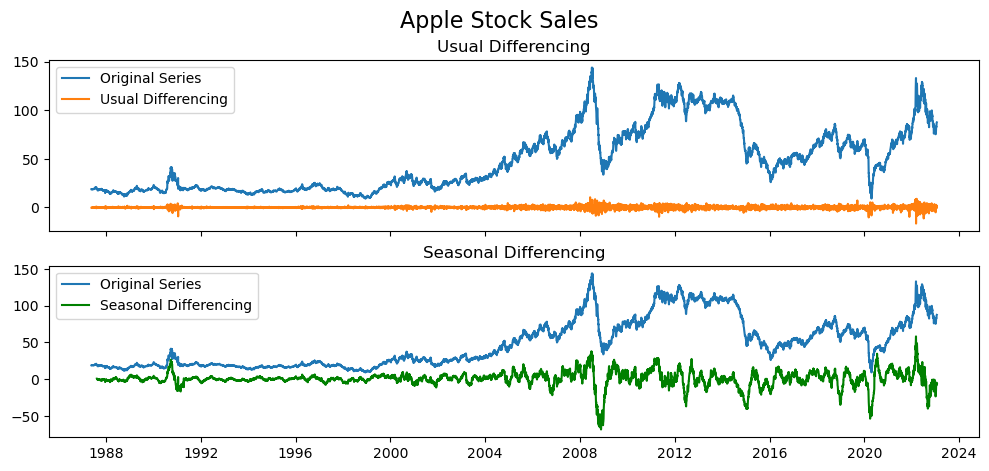

In [58]:
#plot
fig, axes = plt.subplots(2,1,figsize=(12,5),dpi=100,sharex=True)

#usual diffrencing
axes[0].plot(df["Price"], label='Original Series')
axes[0].plot(df["Price"].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasinal Dei
axes[1].plot(df["Price"], label='Original Series')
axes[1].plot(df["Price"].diff(60), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Apple Stock Sales', fontsize=16)
plt.show()

In [59]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 60) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 60)
SARIMAX: (0, 1, 1) x (0, 1, 2, 60)
SARIMAX: (0, 1, 2) x (1, 1, 0, 60)
SARIMAX: (0, 1, 2) x (1, 1, 1, 60)


In [ ]:
import statsmodels.api as sm
model_SA = sm.tsa.SARIMAX(df['Price'], order=(0,1,2), seasonal_order=(1,1,0,57))
result_SA = model_SA.fit()
result_SA.summary()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
